In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [5]:
import cupy as cp

In [6]:
PROJECT_PATH = '../'
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
BLUE_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_Blue_R2300.h5"
NIR_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_NIR_R4300.h5"
sys.path.insert(0, PROJECT_PATH)

# RedM Arm

In [12]:
with h5py.File(REDM_PATH, 'r') as f:
    flux_REDM = f['flux'][()]
    wave_REDM = f['wave'][()]
    para = f["para"][()]

In [9]:
from lv.base.basePCP import PCP

In [10]:
bp = PCP()

In [13]:
bp.prepare_data("RedM", flux_REDM, wave_REDM, para)

# M flux: 7689, wave RedM: (2204,) 
# W flux: 6480, wave RedM: (2204,) 
# C flux: 3780, wave RedM: (2204,) 
# B flux: 3300, wave RedM: (2204,) 
# R flux: 2100, wave RedM: (2204,) 
# G flux: 9972, wave RedM: (2204,) 


In [14]:
bp.prepare_svd()

100%|██████████| 6/6 [00:10<00:00,  1.77s/it]


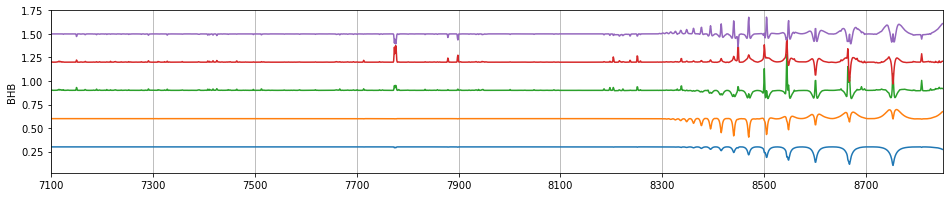

In [34]:
rm.plot_Vs_p("B", step=0.3)

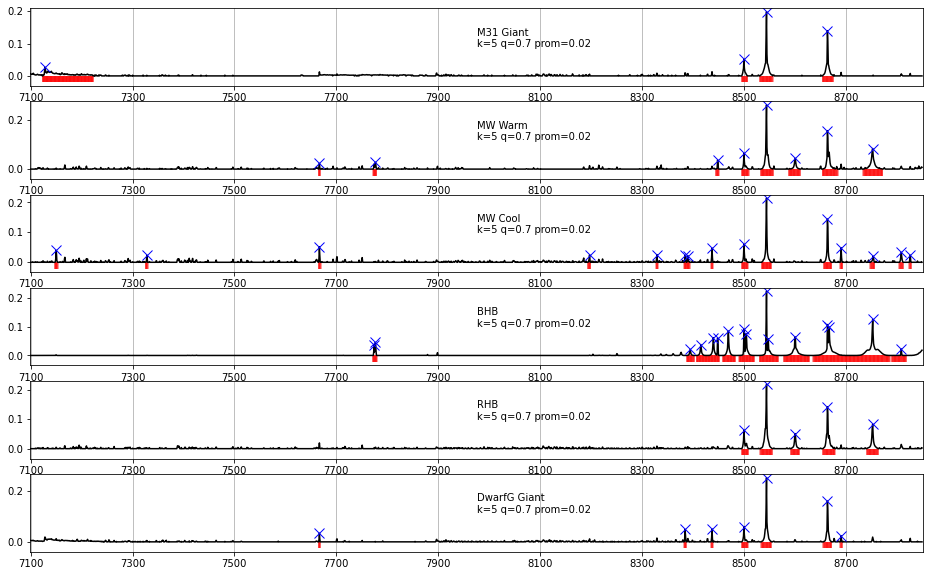

In [35]:
bp.get_masks()

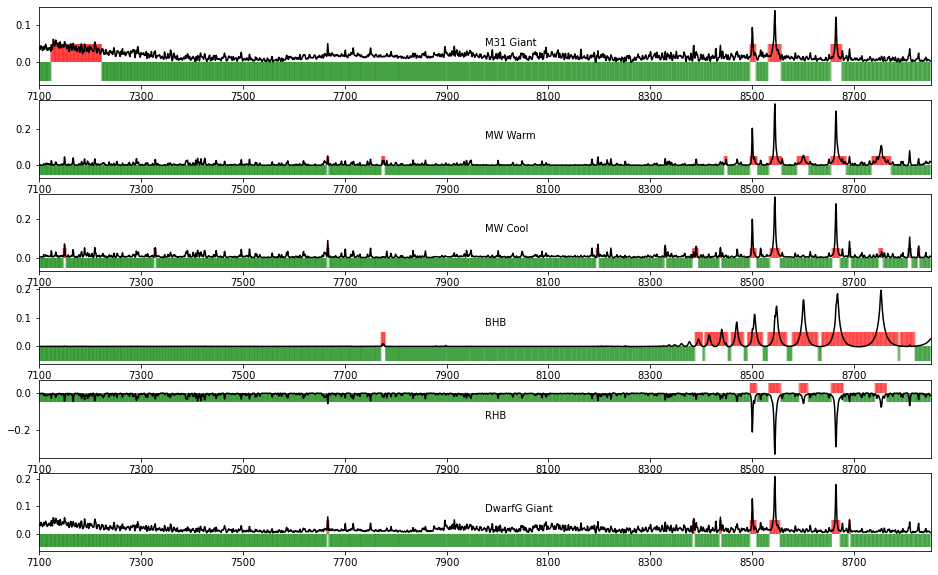

In [38]:
bp.plot_MN_masks(idx=0)

In [45]:
bp.nMsks=bp.Msks

In [46]:
bp.Msks={}

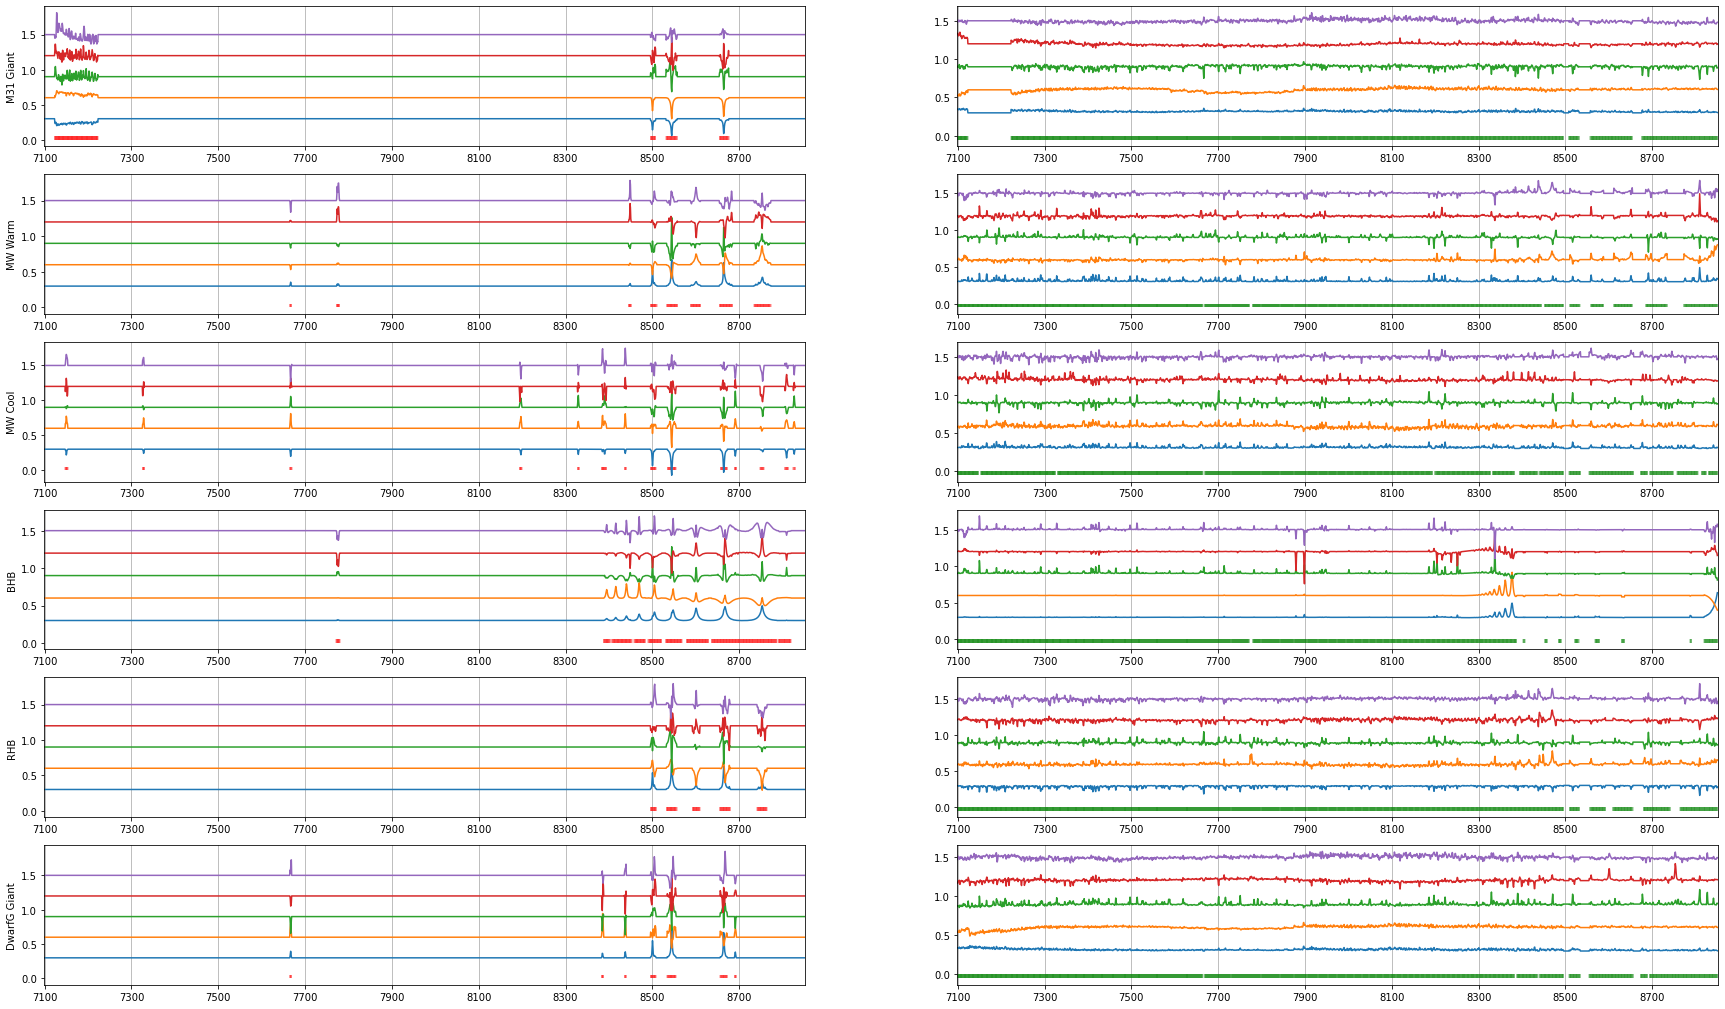

In [51]:
bp.plot_MNs()

In [54]:
bp.ML= {}
bp.MS= {}
bp.MLv= {}
bp.MSv= {}


In [61]:
bp.get_pcp(maxiter=500)

mu 18.76, lambda 0.0114, norm 114938.3
476
M31 Giant L (103, 2204)
mu 54.03, lambda 0.0124, norm 13506.5
216
MW Warm L (74, 2204)
mu 48.11, lambda 0.0163, norm 11850.3


500
MW Cool L (67, 2204)
mu 16.88, lambda 0.0174, norm 24828.7


500
BHB L (195, 2204)
mu 38.63, lambda 0.0218, norm 10497.7
240
RHB L (54, 2204)
mu 65.77, lambda 0.0100, norm 29535.9


500
DwarfG Giant L (41, 2204)


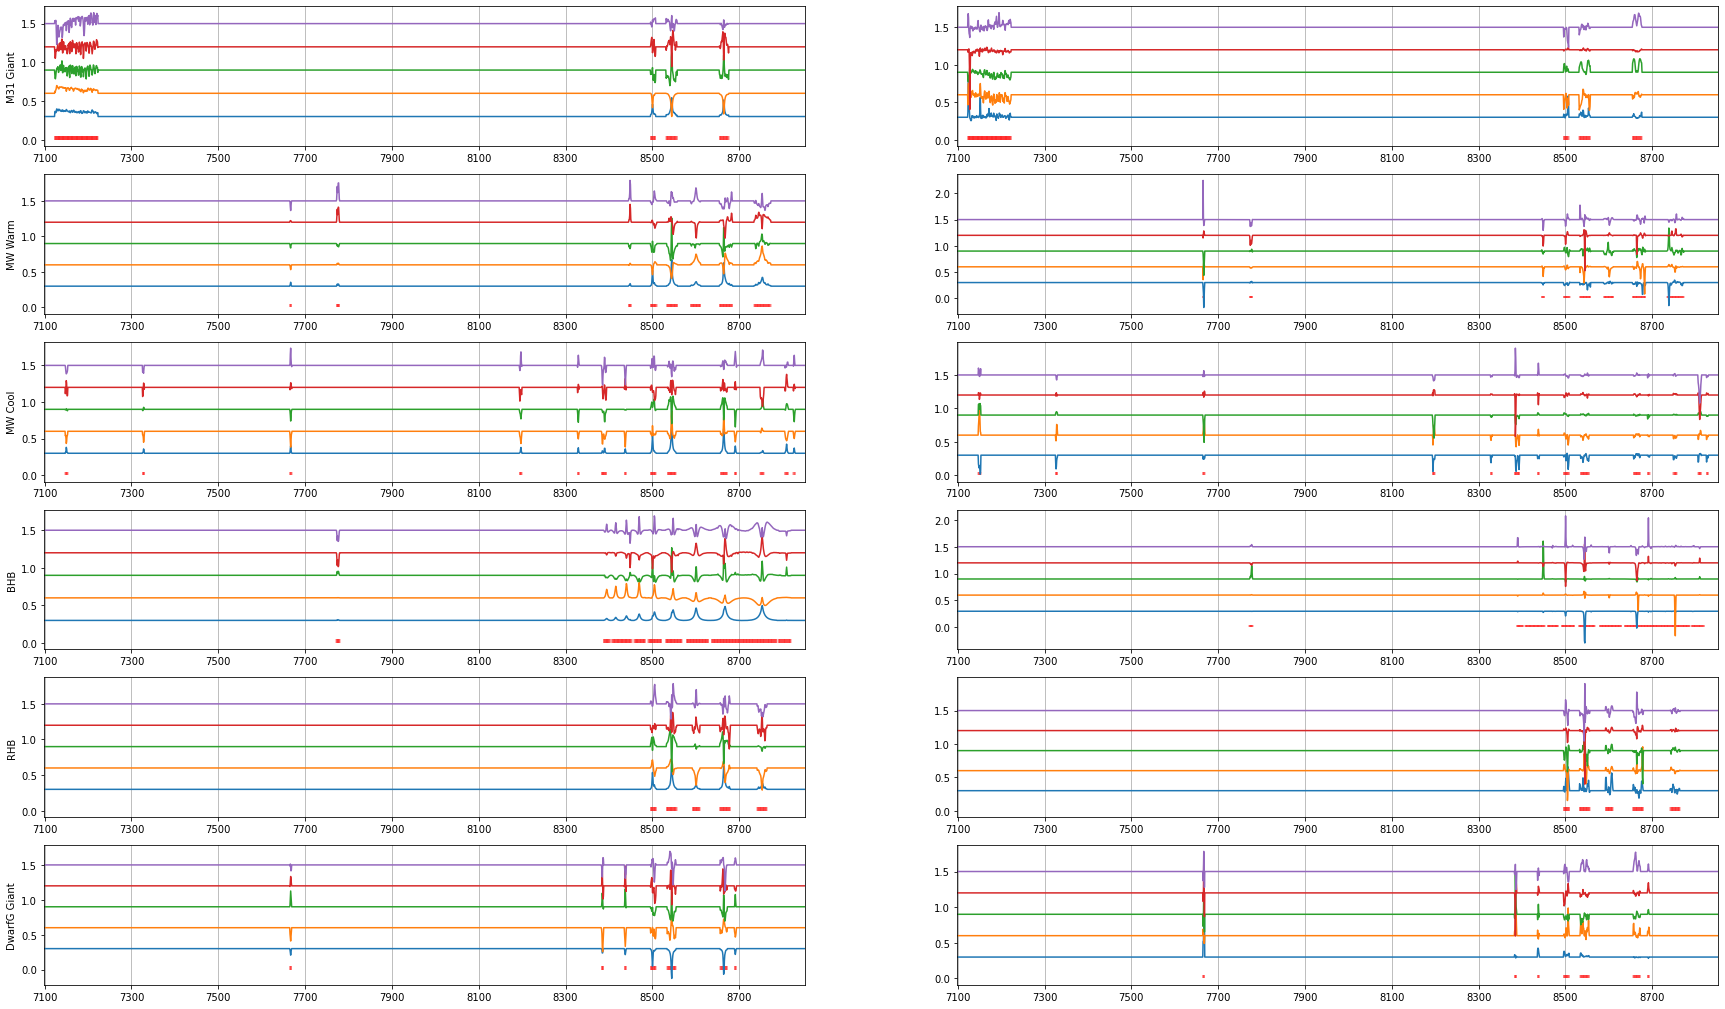

In [63]:
bp.plot_LSs()